
<h1 style="color:purple" >RFM - Recency Frequency Monetary</h1> 

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- **R**ecency – How recently did the customer purchase?
- **F**requency – How often do they purchase?
- **M**onetary Value – How much do they spend?

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. For example, a service-based business could use these calculations:

- **Recency** = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1
- **Frequency** = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1
- **Monetary** = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

Alternatively, categories can be defined for each attribute. For instance, Recency might be broken into three categories: customers with purchases within the last 90 days; between 91 and 365 days; and longer than 365 days. Such categories may be derived from business rules or using data mining techniques to find meaningful breaks.

Once each of the attributes has appropriate categories defined, segments are created from the intersection of the values. If there were three categories for each attribute, then the resulting matrix would have twenty-seven possible combinations (one well-known commercial approach uses five bins per attributes, which yields 125 segments). Companies may also decide to collapse certain subsegments, if the gradations appear too small to be useful. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis. For this reason, it is highly recommended that another set of data be used to validate the results of the RFM segmentation process. Advocates of this technique point out that it has the virtue of simplicity: no specialized statistical software is required, and the results are readily understood by business people. In the absence of other targeting techniques, it can provide a lift in response rates for promotions.

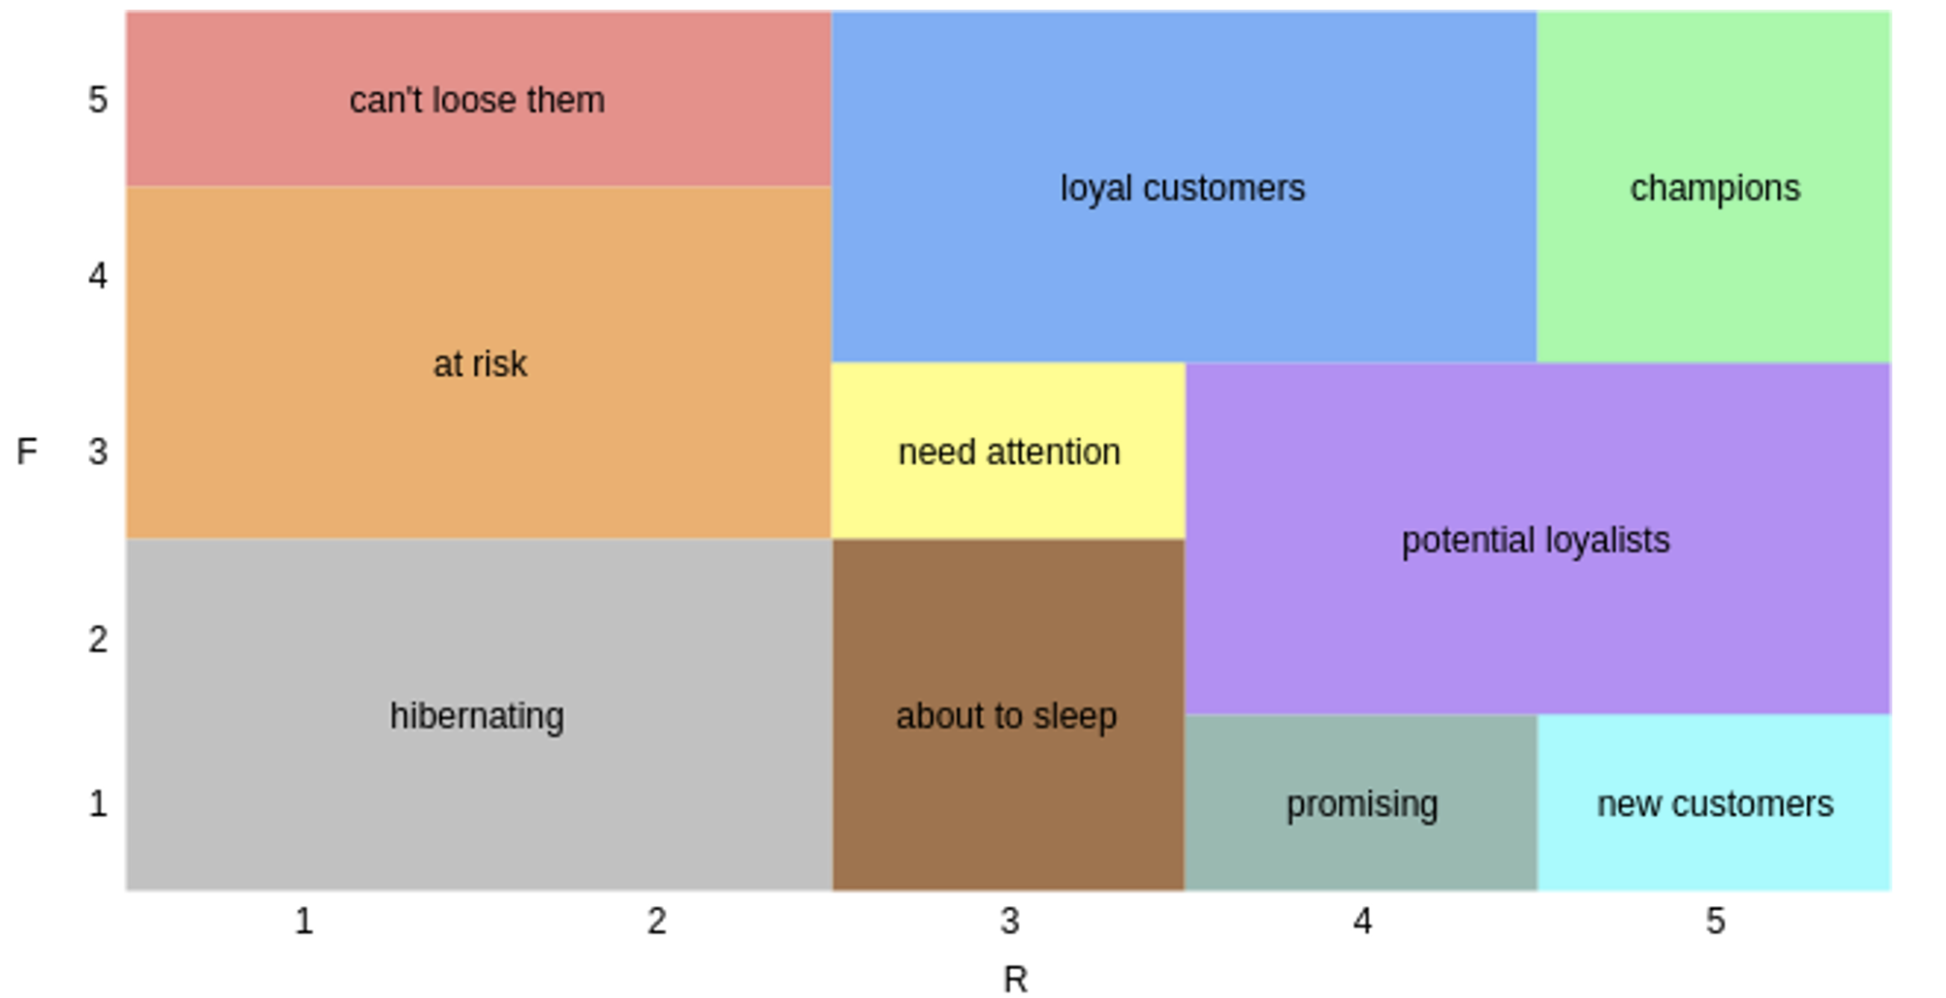

<a id='libraries'></a>
<h1 style="color:purple" >1. Packages</h1> 

In [1]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# TREEMAP
# pip install squarify
import squarify  

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:purple" >2. Data</h1> 

In [2]:
raw1 = pd.read_excel("ACCS Case Study Data.xlsx", sheet_name = "pivot1")
df1 = raw1.copy()
raw2 = pd.read_excel("ACCS Case Study Data.xlsx", sheet_name = "Data")
df2 = raw2.copy()


In [3]:
(df1.shape, df2.shape)

((796, 9), (51290, 11))

In [4]:
df1

,Customer Name,Max Order Date,Days Since Last Order,Count Of Orders,Sum of Sales Value,Recency,Frequency,Monetary,RFM SCORE
0,Aaron Bergman,2015-12-15,108,89,24644.63,4,9,9,22
1,Aaron Hawkins,2015-12-19,104,56,20759.51,3,2,8,13
2,Aaron Smayling,2015-12-08,115,60,14212.63,6,3,4,13
3,Adam Bellavance,2015-11-26,127,68,20186.78,7,6,8,21
4,Adam Hart,2015-12-29,94,84,21718.20,0,9,8,17
...,...,...,...,...,...,...,...,...,...
791,Xylona Preis,2015-11-18,135,61,12198.95,8,4,2,14
792,Yana Sorensen,2015-12-27,96,62,20032.44,1,4,8,13
793,Yoseph Carroll,2015-12-27,96,56,20164.38,1,2,8,11
794,Zuschuss Carroll,2015-12-28,95,85,28479.99,1,9,9,19


In [5]:
df2

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.30,2,0.00,106.14
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.37,3,0.10,36.04
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.12,4,0.00,29.64
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.87,3,0.50,-26.06
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.67,5,0.10,37.77
...,...,...,...,...,...,...,...,...,...,...,...
51285,2015-12-31,2016-01-05,Liz Preis,Kerala,Office Supplies,Consumer,Binders,3.99,1,0.00,0.42
51286,2015-12-31,2016-01-07,Kalyca Meade,Chandigarh,Office Supplies,Corporate,Paper,79.47,3,0.00,25.38
51287,2015-12-31,2016-01-02,Charlotte Melton,Gujarat,Office Supplies,Consumer,Labels,26.40,3,0.00,12.36
51288,2015-12-31,2016-01-04,Julia Barnett,Jammu and Kashmir,Office Supplies,Home Office,Labels,16.74,3,0.00,0.66


<a id='summary'></a>
<h1 style="color:purple" >4. Summary Stats & Outlier Values</h1> 

In [6]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Days Since Last Order,796.00,116.08,33.91,92.00,92.00,93.00,94.00,97.00,108.00,141.50,166.25,209.05,678.00
Count Of Orders,796.00,64.43,13.56,7.00,35.95,43.00,48.00,53.00,64.00,83.00,86.00,97.05,108.00
Sum of Sales Value,796.00,15882.54,5230.99,1401.69,6272.94,8609.24,10055.96,11542.04,15252.48,22785.82,25130.91,30294.06,40488.07
Recency,796.00,4.33,2.97,0.00,0.00,0.00,0.00,1.00,4.00,8.00,9.00,9.00,9.00
Frequency,796.00,4.42,2.89,0.00,0.00,0.00,0.00,1.00,4.00,8.00,9.00,9.00,9.00
Monetary,796.00,4.50,2.87,0.00,0.00,0.00,1.00,2.00,4.50,8.00,9.00,9.00,9.00
RFM SCORE,796.00,13.25,5.68,0.00,2.00,4.00,5.00,8.00,13.00,21.00,22.00,25.00,27.00


In [7]:
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Sales,51290.00,246.49,487.57,0.44,3.69,8.80,13.68,24.55,85.05,632.23,1015.96,2301.00,22638.48
Quantity,51290.00,3.48,2.28,1.00,1.00,1.00,1.00,2.00,3.00,7.00,8.00,11.00,14.00
Discount,51290.00,0.14,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.60,0.70,0.85
Profit,51290.00,28.61,174.34,-6599.98,-351.51,-83.90,-30.57,-4.71,9.24,112.68,211.50,587.36,8399.98


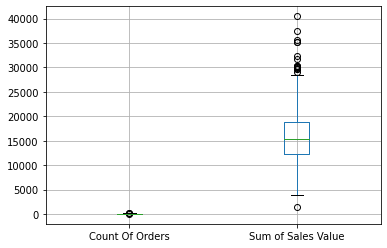

In [8]:
df1[["Count Of Orders", "Sum of Sales Value"]].boxplot();

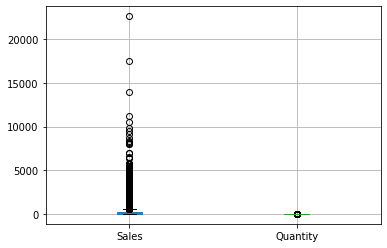

In [9]:
df2[["Sales", "Quantity"]].boxplot();

<a id='rfm'></a>
<h1 style="color:purple" >5. RFM Analysis</h1> 

<h2 style="color:purple" >Recency</h2> 

In [10]:
print("Min Date", df2["Order Date"].min(), "Max Date", df2["Order Date"].max())

Min Date 2012-01-01 00:00:00 Max Date 2015-12-31 00:00:00


In [11]:
recency1 = (dt.datetime(2016, 4, 1) - df2.groupby("Customer Name").agg({"Order Date":"max"})).rename(columns = {"Order Date":"Recency"})
recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)
recency1

,Recency
Customer Name,
Aaron Bergman,108
Aaron Hawkins,104
Aaron Smayling,115
Adam Bellavance,127
Adam Hart,94
...,...
Xylona Preis,135
Yana Sorensen,96
Yoseph Carroll,96


<h2 style="color:purple" >Frequency</h2> 


In [12]:
freq1 = df2.groupby("Customer Name").agg({"Order Date":"nunique"}).rename(columns={"Order Date": "Frequency"})

freq1

,Frequency
Customer Name,
Aaron Bergman,37
Aaron Hawkins,34
Aaron Smayling,31
Adam Bellavance,39
Adam Hart,40
...,...
Xylona Preis,30
Yana Sorensen,31
Yoseph Carroll,30


<h2 style="color:purple" >Monetary</h2> 


In [13]:
monetary1 = df2.groupby("Customer Name").agg({"Sales":"sum"}).rename(columns={"Sales":"Monetary"})

monetary1

,Monetary
Customer Name,
Aaron Bergman,24644.63
Aaron Hawkins,20759.51
Aaron Smayling,14212.63
Adam Bellavance,20186.78
Adam Hart,21718.20
...,...
Xylona Preis,12198.95
Yana Sorensen,20032.44
Yoseph Carroll,20164.38


In [14]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm1.head()

,Recency,Frequency,Monetary
Customer Name,,,
Aaron Bergman,108,37,24644.63
Aaron Hawkins,104,34,20759.51
Aaron Smayling,115,31,14212.63
Adam Bellavance,127,39,20186.78
Adam Hart,94,40,21718.20


<h2 style="color:purple" >Create RFM Score</h2> 

In [15]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer Name,,,,,,
Aaron Bergman,108,37,24644.63,3,5,5
Aaron Hawkins,104,34,20759.51,4,4,5
Aaron Smayling,115,31,14212.63,2,3,3
Adam Bellavance,127,39,20186.78,2,5,5
Adam Hart,94,40,21718.20,5,5,5


In [16]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer Name,,,,,,,
Aaron Bergman,108,37,24644.63,3,5,5,355
Aaron Hawkins,104,34,20759.51,4,4,5,445
Aaron Smayling,115,31,14212.63,2,3,3,233
Adam Bellavance,127,39,20186.78,2,5,5,255
Adam Hart,94,40,21718.20,5,5,5,555


In [17]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer Name,,,,,,,,
Aaron Bergman,108,37,24644.63,3,5,5,355,Loyal Customers
Aaron Hawkins,104,34,20759.51,4,4,5,445,Loyal Customers
Aaron Smayling,115,31,14212.63,2,3,3,233,At Risk
Adam Bellavance,127,39,20186.78,2,5,5,255,Can't Loose
Adam Hart,94,40,21718.20,5,5,5,555,Champions


In [18]:
Count = rfm1.groupby(['Segment']).size().reset_index(name='counts')
Count['Percentage'] = (Count['counts'] / Count['counts'].sum()) * 100

In [19]:
Count.sort_values(by=['Percentage'], ascending=False)

,Segment,counts,Percentage
4,Hibernating,135,16.96
5,Loyal Customers,131,16.46
8,Potential Loyalists,122,15.33
1,At Risk,119,14.95
3,Champions,85,10.68
0,About to Sleep,69,8.67
2,Can't Loose,49,6.16
9,Promising,32,4.02
6,Need Attention,30,3.77
7,New Customers,24,3.02


<h2 style="color:purple" >Summary Statistics</h2> 

In [20]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,109.26,110.00,69,3.19,26.62,27.00,69,2.38,12708.53,12479.15,69,4796.31
At Risk,137.03,129.00,119,23.88,32.80,33.00,119,1.77,16065.01,15816.98,119,3811.72
Can't Loose,130.53,126.00,49,14.07,39.08,39.00,49,2.37,19656.03,17921.50,49,5720.11
Champions,94.15,94.00,85,1.75,37.14,37.00,85,3.26,18678.00,17732.32,85,5160.69
Hibernating,146.47,132.00,135,62.23,26.41,27.00,135,3.48,13229.81,12441.96,135,4285.59
Loyal Customers,105.17,105.00,131,5.00,36.66,36.00,131,2.99,18719.94,18183.16,131,5003.42
Need Attention,110.10,111.00,30,3.13,31.50,32.00,30,0.86,14875.70,14236.91,30,3302.27
New Customers,94.50,94.00,24,1.72,24.29,25.00,24,2.40,12336.52,11671.58,24,4483.10
Potential Loyalists,96.80,97.00,122,3.58,30.10,30.00,122,1.75,15574.58,14719.50,122,4963.13


<a id='visualize'></a>
<h1 style="color:purple" >6. Visualize</h1> 

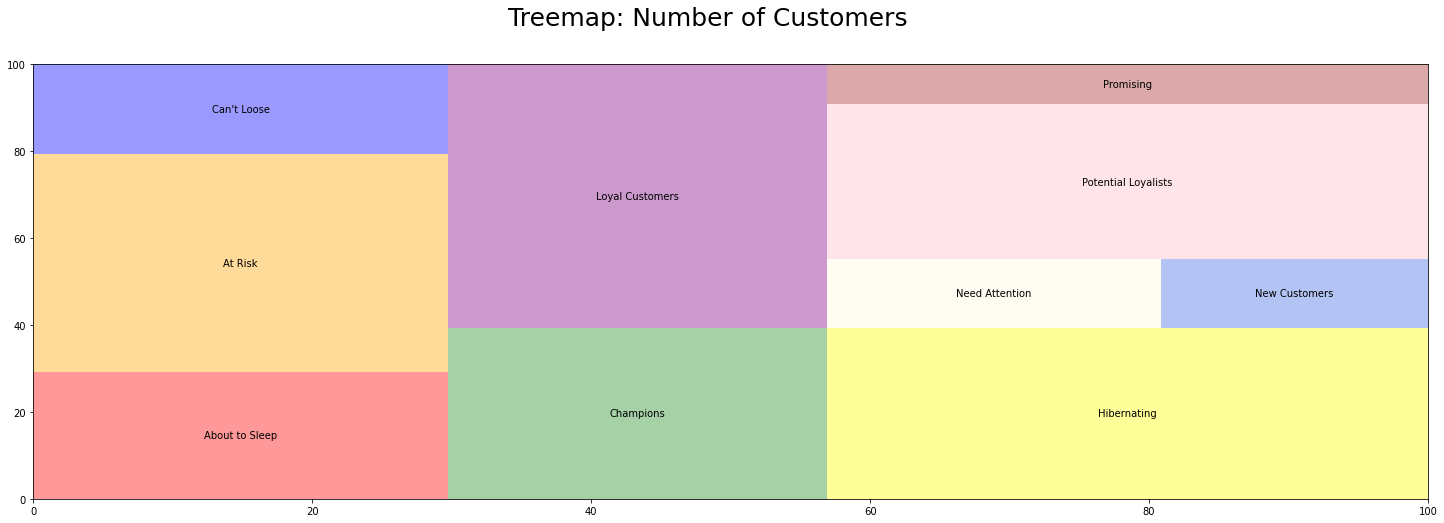

In [21]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers", fontsize=25);


# SEGMENT ANALYSIS

In [22]:
df2.head()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.30,2,0.00,106.14
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.37,3,0.10,36.04
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.12,4,0.00,29.64
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.87,3,0.50,-26.06
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.67,5,0.10,37.77


In [23]:
Count_Segment = df2.groupby(['Segment']).size().reset_index(name='counts')

In [24]:
Count_Segment

,Segment,counts
0,Consumer,26518
1,Corporate,15429
2,Home Office,9343


In [25]:
Total_Count, Segment_Name = Count_Segment['counts'].tolist(), Count_Segment['Segment'].tolist()

In [26]:
Total_Count

[26518, 15429, 9343]

In [27]:
Segment_Name

['Consumer', 'Corporate', 'Home Office']

In [28]:
explode = [0.1, 0.1, 0.1]
colors1 = ["#ffcce7", "#4d5198", "#81b7d2"]

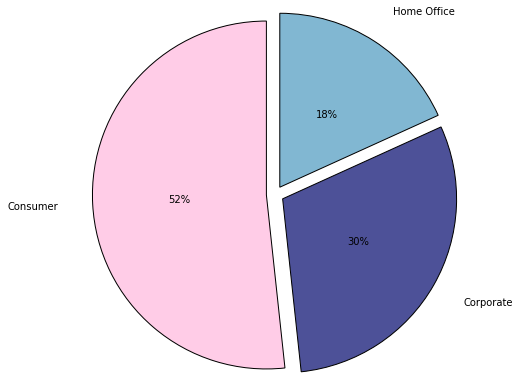

In [29]:
plt.pie(Total_Count, labels=Segment_Name, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, radius = 2, colors = colors1, startangle=90, wedgeprops={'edgecolor': 'black'},explode=explode)
plt.show()

# RANDOM 

In [30]:
df2

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.30,2,0.00,106.14
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.37,3,0.10,36.04
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.12,4,0.00,29.64
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.87,3,0.50,-26.06
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.67,5,0.10,37.77
...,...,...,...,...,...,...,...,...,...,...,...
51285,2015-12-31,2016-01-05,Liz Preis,Kerala,Office Supplies,Consumer,Binders,3.99,1,0.00,0.42
51286,2015-12-31,2016-01-07,Kalyca Meade,Chandigarh,Office Supplies,Corporate,Paper,79.47,3,0.00,25.38
51287,2015-12-31,2016-01-02,Charlotte Melton,Gujarat,Office Supplies,Consumer,Labels,26.40,3,0.00,12.36
51288,2015-12-31,2016-01-04,Julia Barnett,Jammu and Kashmir,Office Supplies,Home Office,Labels,16.74,3,0.00,0.66


In [31]:
Count_Sub = df2.groupby(['Category']).size().reset_index(name='counts')

In [32]:
Count_Sub

,Category,counts
0,Furniture,9860
1,Office Supplies,31289
2,Technology,10141


In [33]:
Count_Cat_Seg = df2.groupby(['Segment', 'Category']).size().reset_index(name='counts')

In [34]:
Count_Cat_Seg

,Segment,Category,counts
0,Consumer,Furniture,5087
1,Consumer,Office Supplies,16159
2,Consumer,Technology,5272
3,Corporate,Furniture,3009
4,Corporate,Office Supplies,9369
5,Corporate,Technology,3051
6,Home Office,Furniture,1764
7,Home Office,Office Supplies,5761
8,Home Office,Technology,1818


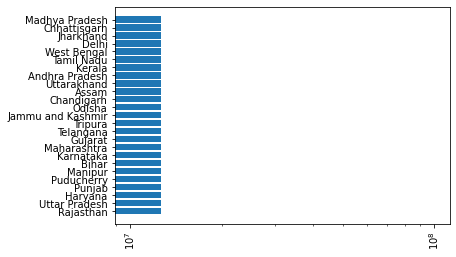

In [35]:
plt.barh(df2['State'], df2['Sales'].sum(), log=True)
plt.xticks(rotation=90)
plt.show()

array([<AxesSubplot:ylabel='Consumer'>, <AxesSubplot:ylabel='Corporate'>,
       <AxesSubplot:ylabel='Home Office'>], dtype=object)

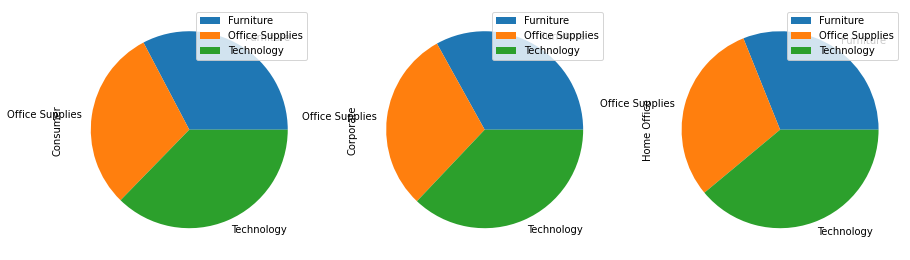

In [36]:
df2.groupby(['Category','Segment'])['Sales'].sum().unstack().plot(kind='pie', subplots=True, figsize=(15,10))

# No Relation Found 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

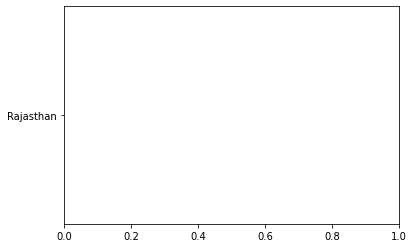

In [38]:
plt.bar(df1["Frequency"],df2["State"], color="blue")
plt.xlabel("States")
plt.ylabel("Frequency")
plt.show()